# EXPLORATORY DATA ANALYSIS(EDA)
#  1) First lets import the required library which will be used for the analysis. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2) Import the data into Pandas dataframe

In [ ]:
df = pd.read_csv("/content/SampleSuperstore.csv")
df.info()
df.head()  #To display top 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.tail()  #To display bottom 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# 3) Dropping null and duplicate values

This is often a handy thing to do because a huge data set as in this case contains nearly 10000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. Also missing values in some numeric data could be dropped.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (17, 13)


In [ ]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.count() 

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

Lets see if there are any missing values in our dataset - 

In [ ]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


We can proceed to further step now.

# 4) Describing the Numeric data to analyse the Sales
  Here, we observe that there are 4 shipping modes. The shipping is done to 49 states in US.



In [ ]:
print(df.nunique(axis=0))
print(df['Ship Mode'].unique()) #number of unique value for each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64
['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [ ]:
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


 We can also see what type of product is being sold.

In [ ]:
df.describe()[["Sales","Quantity","Discount","Profit"]]

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


Lets see the range sales made from every product and the scattered profit/loss.

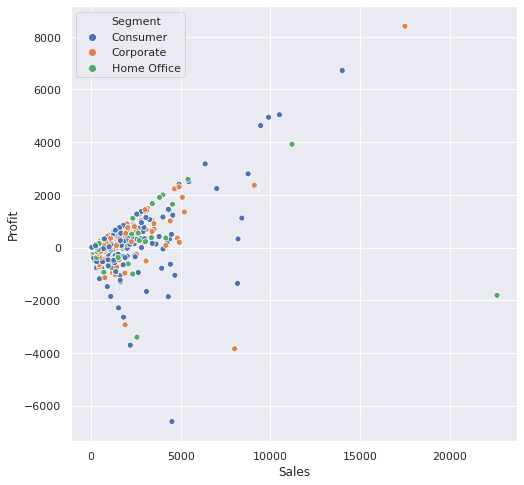

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Sales',y='Profit',data=df,hue='Segment')


Lets look at the total sales and profit made in each state -

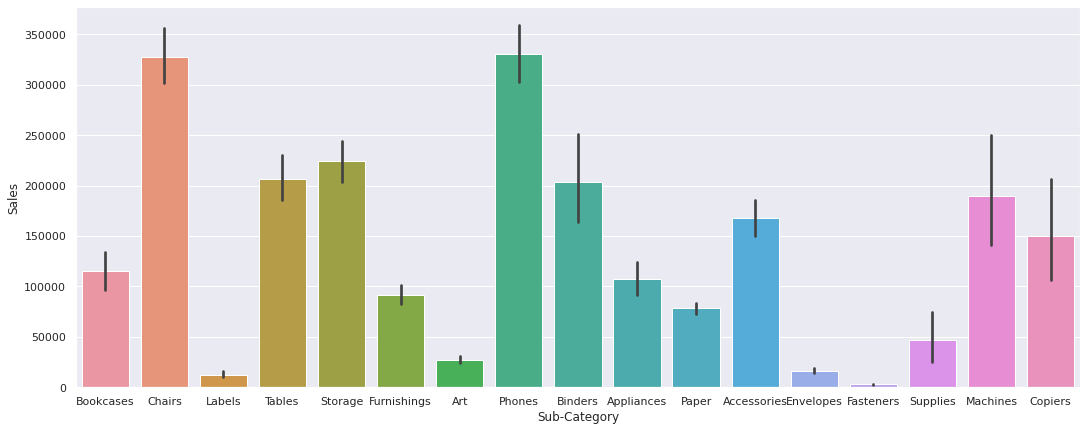

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x="Sub-Category", y="Sales", data=df, estimator=sum)

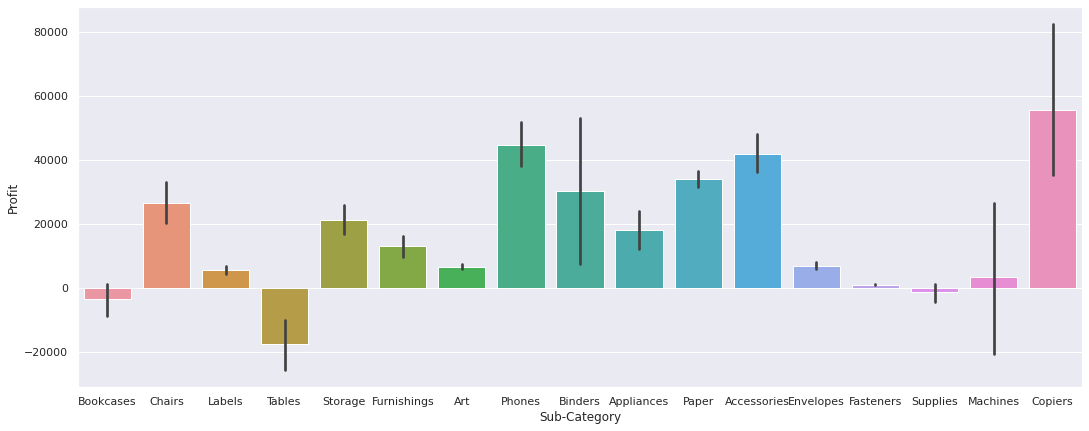

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x="Sub-Category", y="Profit", data=df, estimator=sum)

In [ ]:
df1 = df.loc[(df['Sub-Category'] == 'Bookcases')|(df['Sub-Category'] == 'Tables')|(df['Sub-Category'] == 'Machines') , ['Sub-Category','Discount','Sales']]
df1.reset_index()

,index,Sub-Category,Discount,Sales
0,0,Bookcases,0.00,261.9600
1,3,Tables,0.45,957.5775
2,10,Tables,0.20,1706.1840
3,24,Tables,0.00,1044.6300
4,27,Bookcases,0.50,3083.4300
...,...,...,...,...
657,9931,Bookcases,0.15,683.3320
658,9937,Tables,0.20,71.0880
659,9955,Tables,0.20,273.5680
660,9962,Bookcases,0.32,383.4656


Looking at both the bar graphs, we observe that:    
1. There have been very few sales of Labels, Fasteners, Envelopes. 
2. There is a high demand for furnitures, and Cell Phones. Profit obtained from these can be increased.
3. Loss from the Table sales can be minimized.



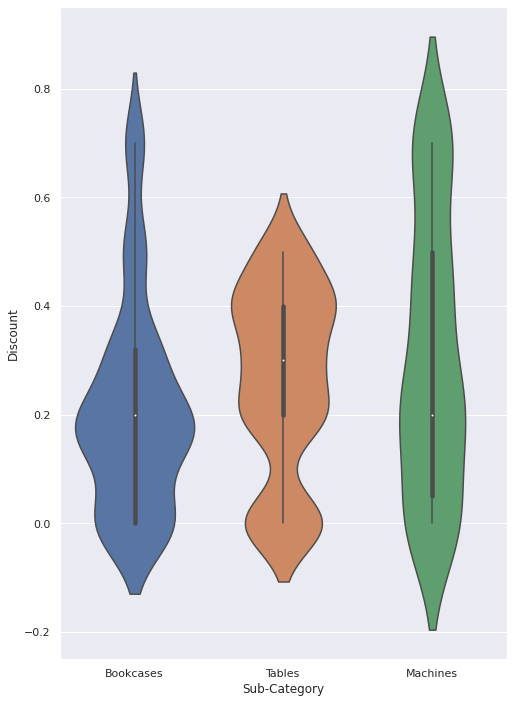

In [ ]:
plt.figure(figsize=(8,12))
sns.violinplot(x='Sub-Category',y='Discount',data=df1)

We could derive some points from the violin plot -

1. The discount on Bookcases per sales is large in the range of 0.2. Discount for the same must be managed.
2. Discount for Tables per sales is extensive in the range of 0.2-0.5. This may be the cause for severe loss obtained.
3.


Lets create a column without the discount and compare the profit.

In [ ]:
df1['No-Discount-Sales'] = df1['Sales']/(1-df1['Discount'])
df1['No-Discount-Sales'].replace(np.inf,np.nan,inplace=True) 
df1['No-Discount-Sales'].fillna(df1.Sales, inplace=True)
df1


,Sub-Category,Discount,Sales,No-Discount-Sales
0,Bookcases,0.00,261.9600,261.96
3,Tables,0.45,957.5775,1741.05
10,Tables,0.20,1706.1840,2132.73
24,Tables,0.00,1044.6300,1044.63
27,Bookcases,0.50,3083.4300,6166.86
...,...,...,...,...
9931,Bookcases,0.15,683.3320,803.92
9937,Tables,0.20,71.0880,88.86
9955,Tables,0.20,273.5680,341.96
9962,Bookcases,0.32,383.4656,563.92


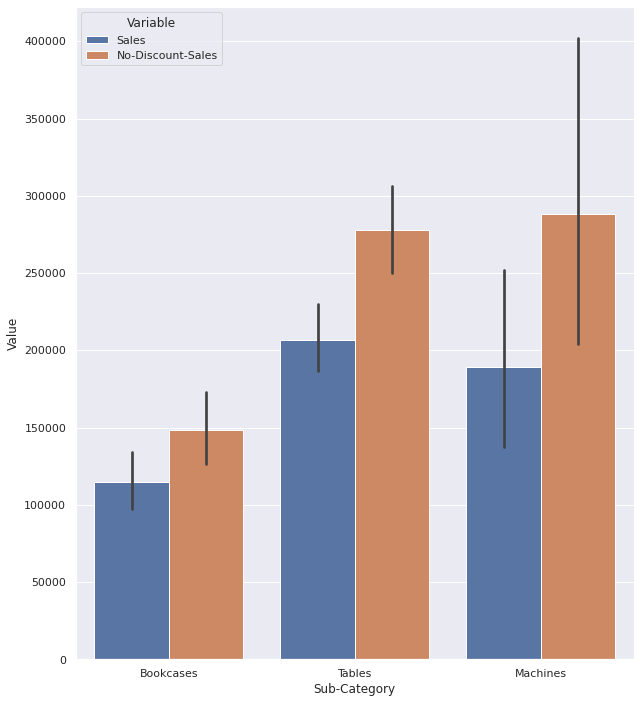

In [ ]:
del df1['Discount']
plt.figure(figsize=(10,12))
tidy = df1.melt(id_vars='Sub-Category').rename(columns=str.title)
sns.barplot(x='Sub-Category', y='Value', hue='Variable', data=tidy,estimator=sum)

There could be alot more sales made for Tables and Machines if the discount is reduced. 

Lets look at sales made in each state -

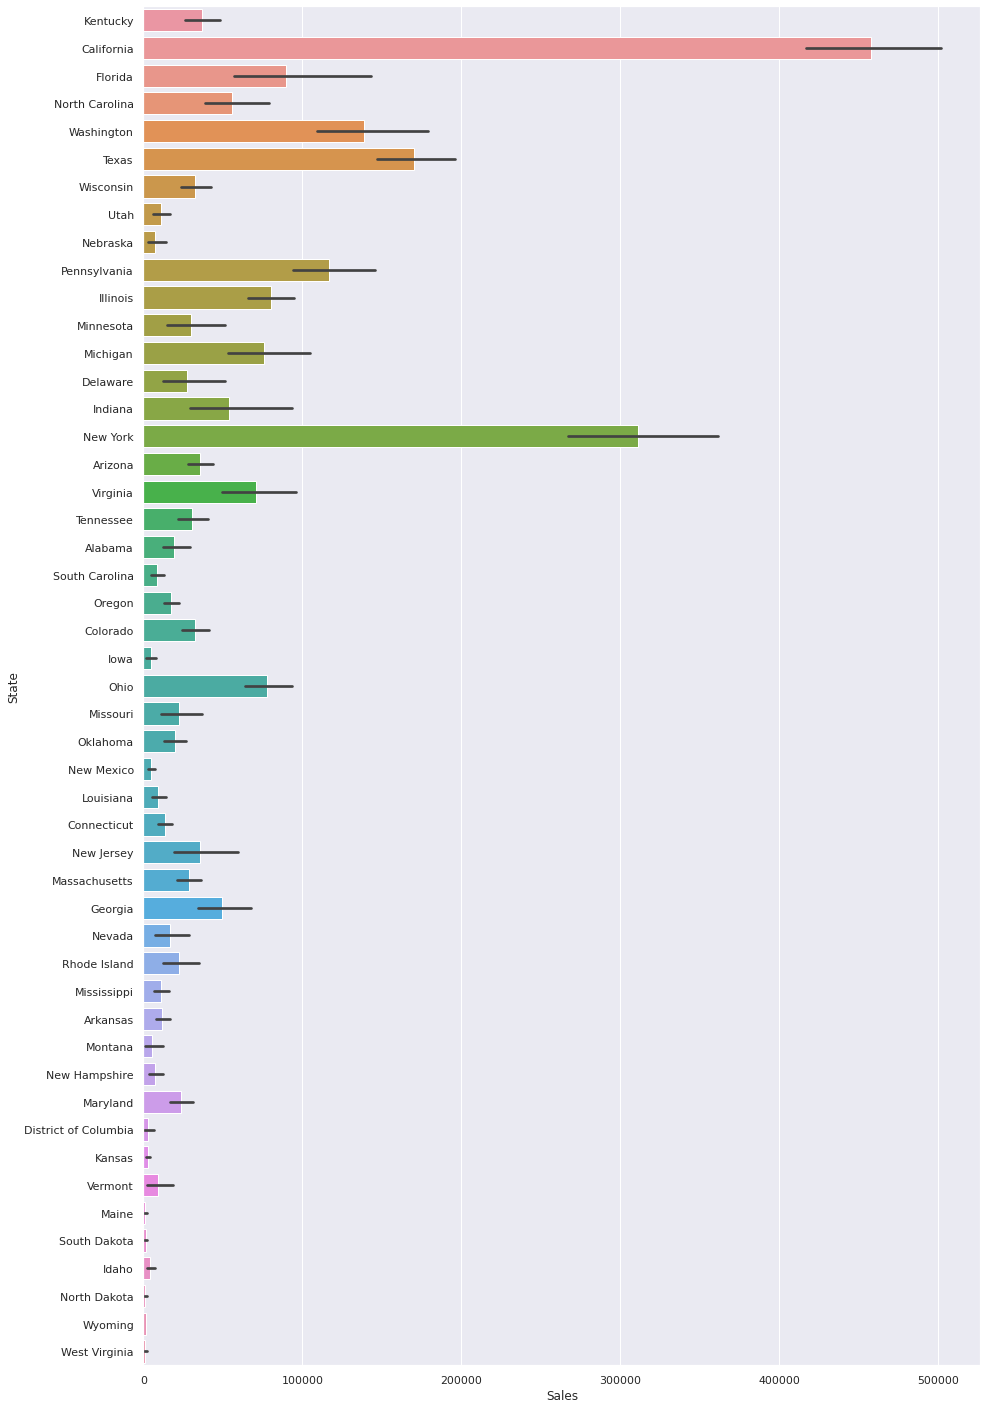

In [ ]:
plt.figure(figsize=(15,25))
sns.barplot(x="Sales", y="State", data=df, estimator=sum)

California, Washington, Texas, New York and Pennsylvania have produced more than 10K sales individually. Lets further explore on which product have more demand in these regions so that we could increase the production for those.

In [ ]:
df2 = df.loc[(df['State'] == 'California')|(df['State'] == 'New York')|(df['State'] == 'Texas')| (df['State'] == 'Washington')|(df['State'] == 'Pennsylvania') , ['State','Sub-Category','Sales','Profit']]
df2.reset_index()

,index,State,Sub-Category,Sales,Profit
0,2,California,Labels,14.620,6.8714
1,5,California,Furnishings,48.860,14.1694
2,6,California,Art,7.280,1.9656
3,7,California,Phones,907.152,90.7152
4,8,California,Binders,18.504,5.7825
...,...,...,...,...,...
5189,9986,California,Accessories,36.240,15.2208
5190,9990,California,Furnishings,91.960,15.6332
5191,9991,California,Phones,258.576,19.3932
5192,9992,California,Paper,29.600,13.3200


In [59]:
sns.catplot(x="Sub-Category", y="Sales", data=df2,col="State",kind="bar",col_wrap=1, height=30, aspect=4 ,estimator=sum)
sns.set(font_scale=13)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)